# Solutions to Exercises in Predictive Modeling

### Exercise: Old Faithful.

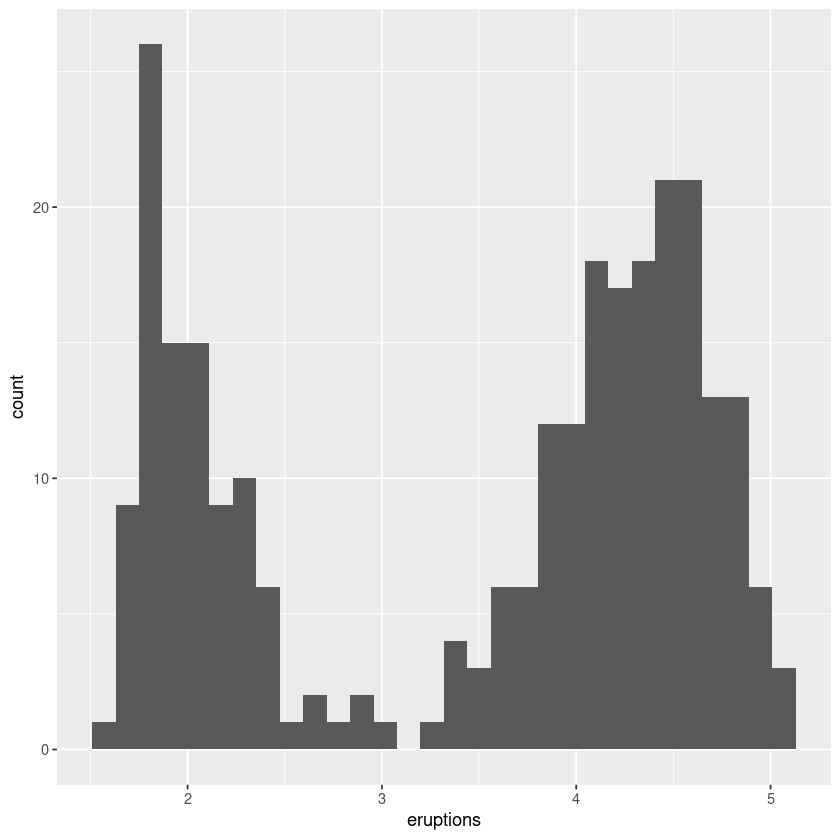

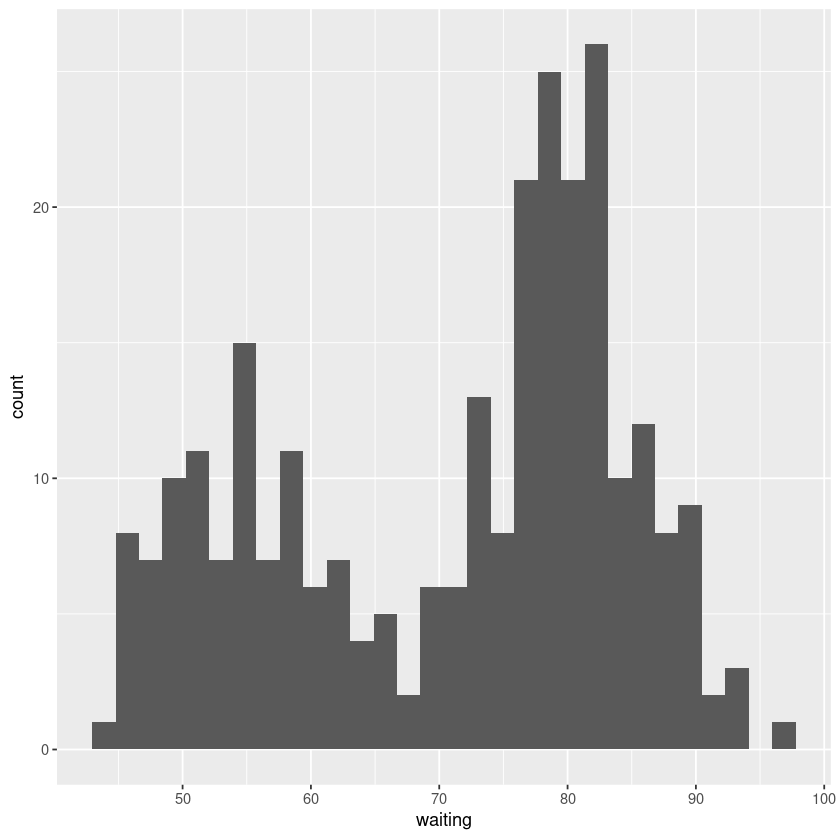

In [1]:
ggplot(faithful) + geom_histogram(aes(x=eruptions), bins=30)
ggplot(faithful) + geom_histogram(aes(x=waiting), bins=30)

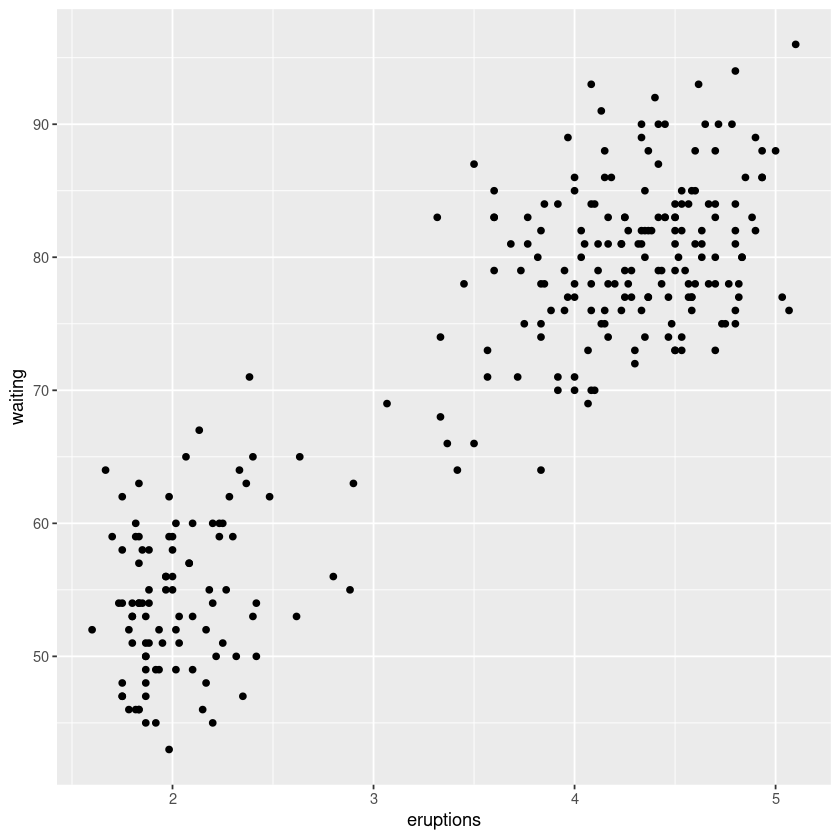

In [2]:
ggplot(faithful) + geom_point(aes(x=eruptions, y=waiting))

It appears that there are two types of eruptions, those of shorter
  duration and those of longer duration. Eruptions of short duration are followed
  by short waiting times until the next eruption. Eruptions of long duration
  are followed by long waiting times.

In [ ]:
fm <- lm(waiting ~ eruptions, data=faithful)
summary(fm)

  The intercept $\beta_0 = 33.47$ represents the average
  waiting time (until the next eruption) just after observing an
  eruption of zero minutes in duration. So, it's not really all that
  meaningful.

  The coefficient on duration $\beta_1 = 10.7$ represents
  the average effect on waiting time for a one--minute increase in
  duration. In other words, for every minute of duration of an eruption,
  you will have to wait an additional 10.7 minutes until the next eruption
  (or long eruptions are followed by long waiting times).

  The predicted waiting time is
  
  $ \beta_0 + \beta_14 = 33.47 + 10.73 \times 4 = 76.4~\text{minutes} $ 
  
  Regarding the uncertainty in the
  prediction, you can either 1) look at the scatter plot right around
  the duration value of 4 minutes and see that the range is about 25
  minutes, or 2) look at the residual standard error from the summary
  of the fitted model. It shows that $\sigma = 5.9$. We know that the
  observations should be within about 3 standard errors of the mean,
  the range would be $\pm 5.9\times 3 = \pm16.8$, or a range of about 32. So a prediction between about 20 and 35 minutes is reasonable. The idea of this exercise is that
  a prediction represents a point estimate and that there is
  uncertainty in that estimate.


### Exercise: Cherry trees


Call:
lm(formula = Volume ~ Girth, data = trees)

Residuals:
   Min     1Q Median     3Q    Max 
-8.065 -3.107  0.152  3.495  9.587 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -36.9435     3.3651  -10.98 7.62e-12 ***
Girth         5.0659     0.2474   20.48  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.252 on 29 degrees of freedom
Multiple R-squared:  0.9353,	Adjusted R-squared:  0.9331 
F-statistic: 419.4 on 1 and 29 DF,  p-value: < 2.2e-16


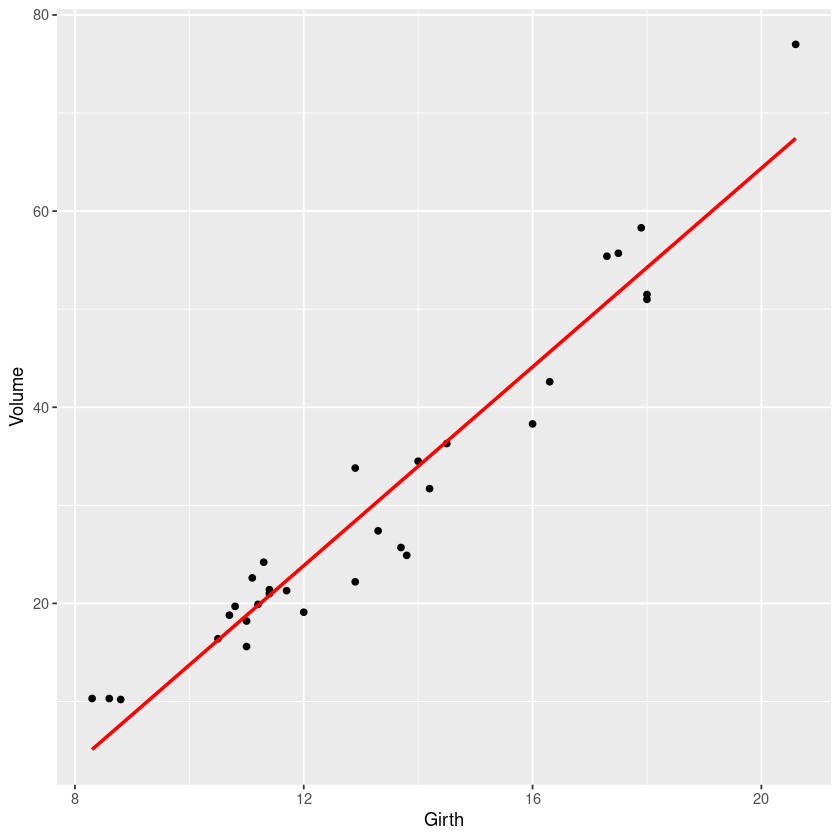

In [1]:
fm <- lm(Volume ~ Girth, data=trees)
summary(fm)

# plot the data and overlay the fitted regression line
ggplot(trees, aes(x=Girth, y=Volume)) +
    geom_point() +
    geom_smooth(method = "lm", formula = "y ~ x", se = FALSE, color="red")

The coefficient on girth is 5.0659. This means that, on average, a one inch increase in the diameter of the tree will result in the volume increasing by 5.0659 cubic feet. The $p$-value of 2e-16 represents the probability that we would obtain a data set such as this one when there is really no relationship between volume and girth. So, a very small $p$-value indicates that there is (most likely) a relationship between the response and the predictor.

### Exercise: Fuel efficiency

In [3]:
fm <- lm(mpg ~ cyl + hp + wt, data = mtcars)
summary(fm)


Call:
lm(formula = mpg ~ cyl + hp + wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9290 -1.5598 -0.5311  1.1850  5.8986 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 38.75179    1.78686  21.687  < 2e-16 ***
cyl         -0.94162    0.55092  -1.709 0.098480 .  
hp          -0.01804    0.01188  -1.519 0.140015    
wt          -3.16697    0.74058  -4.276 0.000199 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.512 on 28 degrees of freedom
Multiple R-squared:  0.8431,	Adjusted R-squared:  0.8263 
F-statistic: 50.17 on 3 and 28 DF,  p-value: 2.184e-11


The coefficient on weight $\beta_3 \approx -3.17$ means that for every 1000 lb increase in weight, fuel efficiency decreases by approximately 3.17 miles per gallon. The coefficients on the number of cylinders and horsepower are also negative, but the large magnitudes of the $p$-values (.098 and .140, respectively) indicate that their relationship to fuel efficiency is weak at best. 

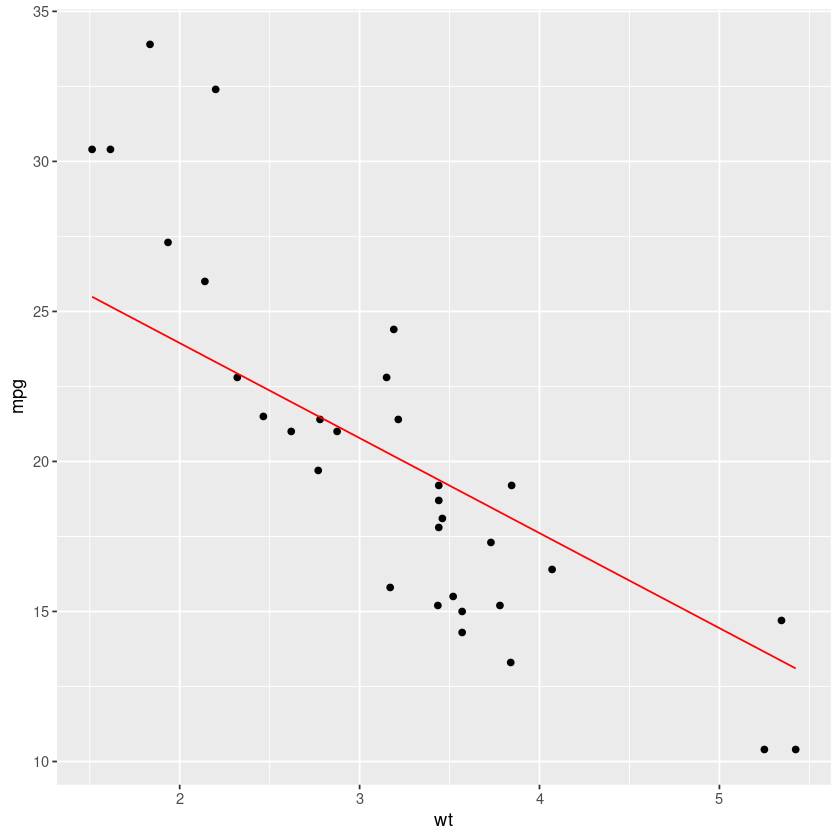

In [4]:
beta0 <- coef(fm)[1] # intercept
beta1 <- coef(fm)[2] # cyl
beta2 <- coef(fm)[3] # hp
beta3 <- coef(fm)[4] # wt

mtcars.adj <- mutate(mtcars,
                   mpg.adj = beta0 + beta1*mean(cyl) + beta2*mean(hp) + beta3*wt
                   )

ggplot(mtcars.adj) +
    geom_point(aes(x=wt, y=mpg)) +
    geom_line(aes(x=wt, y=mpg.adj), color="red")

To plot the fuel efficiency for a car with an average number of cylinders and an average horsepower rating, we create a new variable mpg.adj (adjusted miles per gallon) using the mutate function. A good strategy when doing this is to create a completely new data frame, leaving the original data unaltered. It's then easy to fix any errors and re-execute the code.

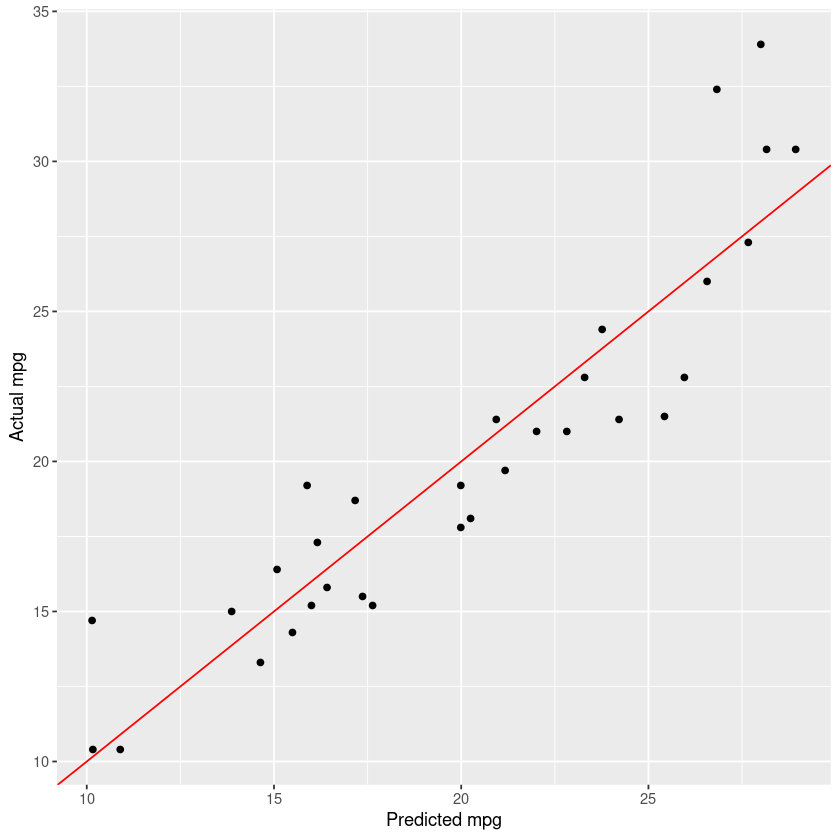

In [7]:
mtcars.adj$pred <- fitted(fm)

ggplot(mtcars.adj) +
    geom_point(aes(x=pred, y=mpg)) +
    geom_abline(color="red") +
    labs(x="Predicted mpg", y="Actual mpg")

The plot of actual vs predicted mpg shows that a linear model is appropriate for this data, with the possible exception of cars that have very high fuel efficiency. We can compute the residual standard error (independently) by using R like a calculator.

In [6]:
n <- nrow(mtcars)
k <- 4
y <- mtcars.adj$mpg
y.hat <- mtcars.adj$pred

sqrt( sum((y - y.hat)^2) / (n-k) )

[1] 2.511548

### Exercise: Linear regression with numeric and categorical predictors.

For the plot, we put the data into "long" format so that it's easier to use ggplot2.

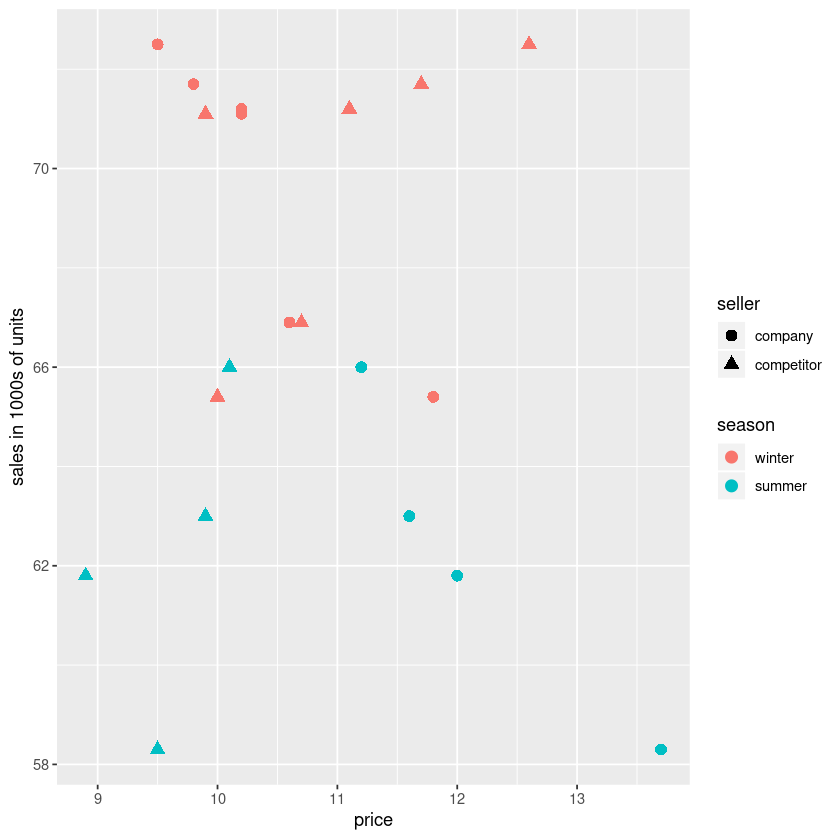

In [2]:
Sales <- read.csv("../data/sales.csv")
Sales$season <- factor(Sales$season, levels=c(0,1),
                   labels=c("winter","summer"))

## put the data in long format for ggplot2
price <- with(Sales, c(company.price, competitor.price))
sales <- with(Sales, rep(sales, 2))
seller <- factor(rep(c("company","competitor"), each=10))
season <- with(Sales, rep(season, 2))
Sales2 <- data.frame(price=price, sales=sales, seller=seller, season=season)

ggplot(Sales2) +
    geom_point(aes(x=price, y=sales, shape=seller, color=season), size=3) +
    labs(y="sales in 1000s of units")

The relationships among the variables are now easy to see. Sales for this item are higher in winter than in summer, regardless of price. We can also see that as the company's price increases, sales decrease. As the competitors price increases, the company's sales increase. Noticing these relationships serves as a check on the output from the regression model. We what to expect for the signs on the coefficients.

In [3]:
fm <- lm(sales ~ company.price + competitor.price + season, data=Sales)
summary(fm)
coef(fm)


Call:
lm(formula = sales ~ company.price + competitor.price + season, 
    data = Sales)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.10593 -0.55162  0.09827  0.84919  1.08960 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       97.8067    11.2889   8.664  0.00013 ***
company.price     -2.9269     0.5778  -5.066  0.00230 ** 
competitor.price   0.2078     0.6079   0.342  0.74407    
seasonsummer      -2.0388     1.1770  -1.732  0.13395    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.229 on 6 degrees of freedom
Multiple R-squared:  0.9566,	Adjusted R-squared:  0.9349 
F-statistic: 44.08 on 3 and 6 DF,  p-value: 0.0001759


(Intercept)    company.price competitor.price     seasonsummer 
      97.8067339       -2.9268642        0.2078464       -2.0388312


$\beta_0$ is the average company sales at a company price of zero dollars
and a competitor price of zero dollars for the winter season.

$\beta_1$ is the effect on sales of a one dollar increase in the company
price, holding competitor price and season constant. So, for every one dollar
increase in company price, sales decrease by about 2,927 units.

$\beta_2$ is the effect on sales of a one dollar increase in competitor
price. For each one dollar increase in competitor price, sales increase
by about 208 units, holding company price and season constant.

$\beta_3$ is the effect on sales of going from the winter season
to the summer season, holding prices constant. On average, the company
sells about 2039 less units during summer.

Competitor price should not be included in the model because
the $p$-value is large, meaning that competitor price has little or no
effect on company sales.

If both companies charge \$11 during the winter season, expected sales are

$\beta_0 + \beta_111 + \beta_211 \approx 68$

or about 68,000 units.

### Exercise: Logistic regression.
  The probability of response for
  a 42-year-old-male is .57, and the probability of response for a
  52-year-old male is about .866. Although it's not entirely necessary, we use the unname() function when printing these estimates in order to get rid of the name portion of the vector that remains from the call to coef(). It's just to avoid any confusion. Now, note that
  the coefficient on gender is 3.48 and that female
  is the reference level. This means that the log odds of response
  increase by 3.48 when going from female to
  male. So, males have a higher probability of response for
  this particular treatment. The log odds of
  response increase by 0.1578 for each one-year increase in age. This
  means that the odds of response increase by a multiplicative factor
  of
  $$ e^{0.1578} = 1.17 $$
  or about 17%.


In [2]:
Med <- read.csv("../data/harrell.csv")

fm <- glm(response ~ age + gender, family=binomial(link="logit"), data=Med)
summary(fm)

invlogit <- function(x) 1/(1+exp(-x))  # helper function

beta0 <- coef(fm)[1]  # pull out the coefficients
beta1 <- coef(fm)[2]
beta2 <- coef(fm)[3]

unname(invlogit(beta0 + beta1*42 + beta2))  # 42 yr-old male
unname(invlogit(beta0 + beta1*52 + beta2))  # 52 yr-old male


Call:
glm(formula = response ~ age + gender, family = binomial(link = "logit"), 
    data = Med)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.86541  -0.80834   0.03996   0.78141   2.16962  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  -9.8302     3.6736  -2.676  0.00745 **
age           0.1578     0.0616   2.562  0.01040 * 
gendermale    3.4849     1.1991   2.906  0.00366 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 55.452  on 39  degrees of freedom
Residual deviance: 38.904  on 37  degrees of freedom
AIC: 44.904

Number of Fisher Scoring iterations: 5


[1] 0.5705549

[1] 0.8655915

We use geom_jitter() to plot the actual repsonse values of zero and one in order to avoid plotting values with the same age and response directly on top of one another.

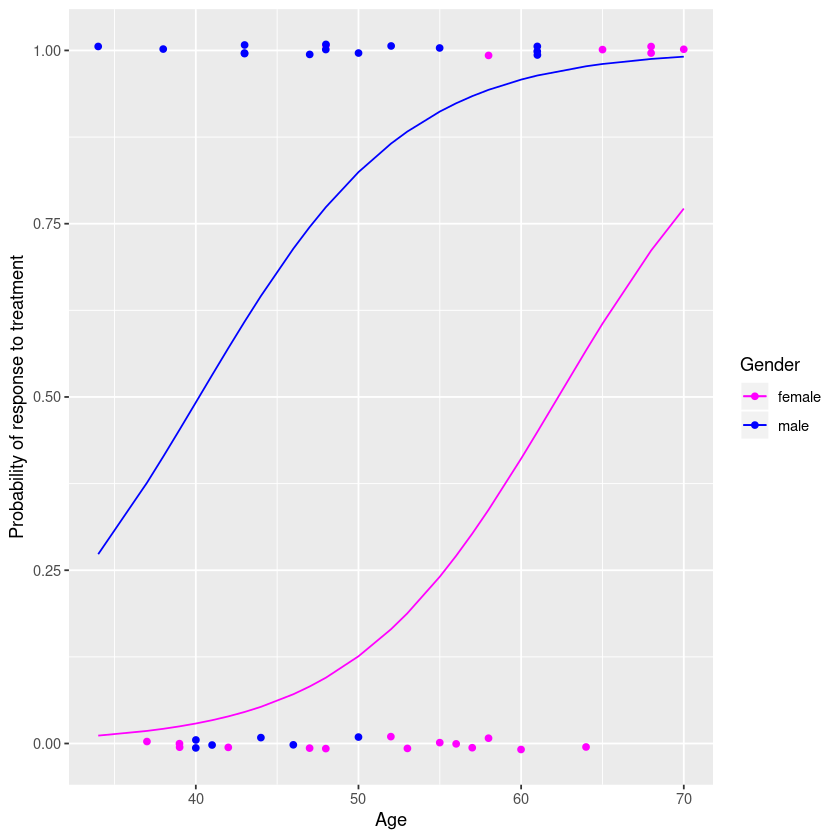

In [5]:
## compute probability of response as a function of age
## for males and for females and plot.
Med <- mutate(Med,
            p.male = invlogit(beta0 + beta1*age + beta2),
            p.female = invlogit(beta0 + beta1*age)
            )

ggplot(Med) +
    geom_jitter(aes(x=age, y=response, color=gender), height=.01, width=.01) +
    geom_line(aes(x=age, y=p.male, color="male")) +
    geom_line(aes(x=age, y=p.female, color="female")) +
    labs(x="Age", y="Probability of response to treatment") +
    scale_color_manual(name="Gender", values=c(male="blue",female="magenta"))

### Exercise: Moving average and exponential smoothing of sales data.

Warning message:
“Removed 2 rows containing missing values (geom_path).”


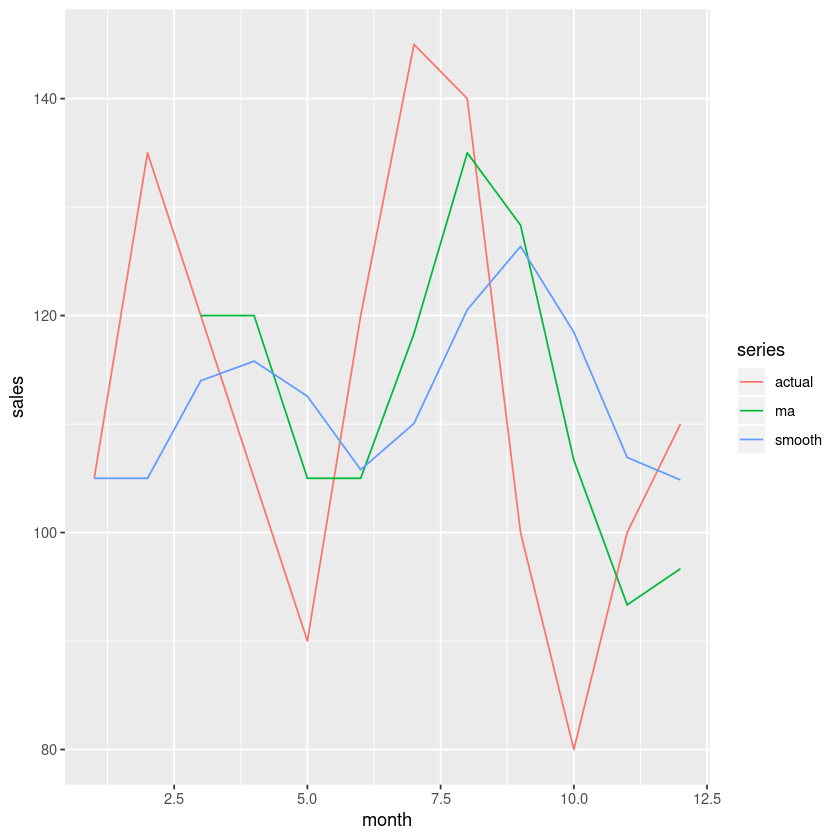

In [3]:
Sales <- tibble(
    month=1:12,
    actual=c(105,135,120,105,90,120,145,140,100,80,100,110),
    ## compute the 3-period moving average
    saleslag1 = dplyr::lag(actual, 1),
    saleslag2 = dplyr::lag(actual, 2),
    ma = (actual + saleslag1 + saleslag2) / 3 
)

## compute the exponential smoothing values
alpha <- 0.3  # the smooting parameter
n <- nrow(Sales)
smooth <- numeric(n)         # will hold the smoothed values
smooth[1] <- Sales$actual[1] # to start the exponential smooting formula

for (i in 1:(n-1)) {
    smooth[i+1] <- alpha * Sales$actual[i] + (1-alpha) * smooth[i]
}

Sales$smooth <- smooth

## put the data in "long" format so that plotting with ggplot2 is easy
SalesLong <- Sales %>%
    pivot_longer(c(actual, ma, smooth), names_to = "series", values_to = "sales")

ggplot(SalesLong) +
    geom_line(aes(x=month, y=sales, color=series))

We use the lag() function from the dplyr package to obtain the 1-month and 2-month lagged values for computing the 3-period moving average. Notice that in lines 5 and 6, we prepend dplyr:: when calling the lag function because there is a function of the same name in the stats package. The warning message from ggplot2 alerts us to the fact that the first two values of the moving average series are missing (which already knew). The warning is harmless, but it's a still a good reminder that data values are missing from the plot.

When computing the exponentially smoothed average values, it's more natural to write a loop. Then, we simply follow follow the formula for exponential smoothing. The only quirk is that we need a starting value for the series (see line 14).

The 3-period moving average lags the actual sales data, which is typical. The exponentially smoothed values are smaller in magnitude than the 3-period moving average.

### Exercise: Simulation of a simple trading strategy.

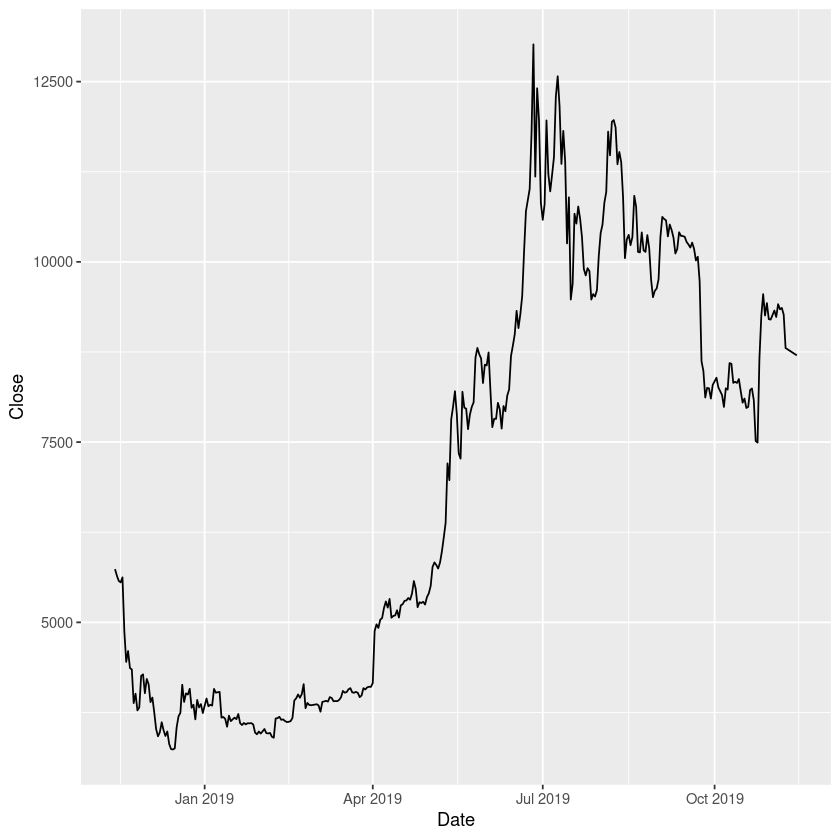

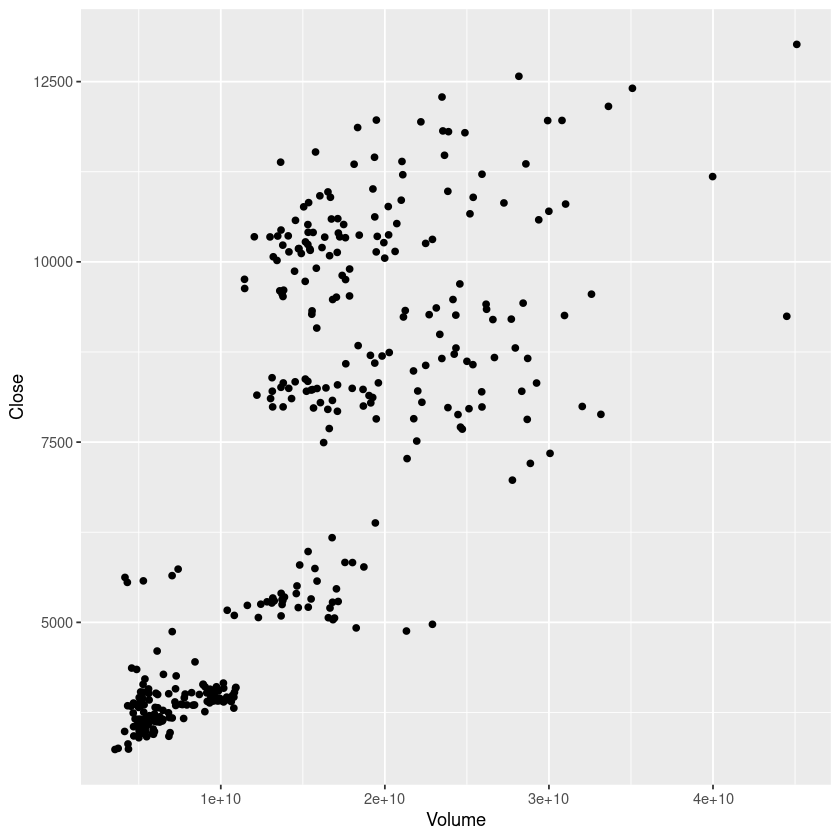

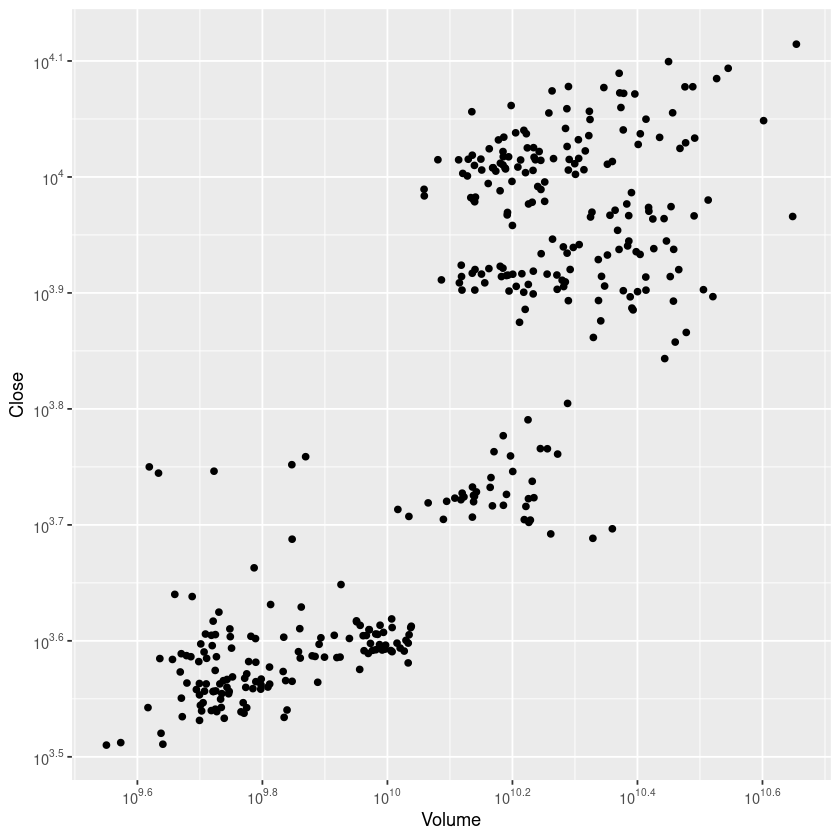

In [3]:
Bit <- read.csv("../data/BTC-USD.csv", stringsAsFactors=FALSE)
Bit$Date <- as.Date(Bit$Date)

(p <- ggplot(Bit) + geom_line(aes(x=Date, y=Close)))

(p2 <- ggplot(Bit) + geom_point(aes(x=Volume, y=Close)))

## plot Close vs Volume on log scale
require(scales)
p2 + scale_x_log10(breaks = trans_breaks("log10", function(x) 10^x),
                  labels = trans_format("log10", math_format(10^.x))) +
    scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x),
                  labels = trans_format("log10", math_format(10^.x)))

Closing price and volume are positively correlated. The logarithmic transformation helps to spread out the observations in the lower left corner and also puts a penalty on observations with very high values.

In [8]:
## get set up
alpha <- 0.5  # the smooting parameter
n <- length(Bit$Close)
net <- 0                 # gain/loss
fcst <- numeric(n)       # will hold the forecast
fcst[1] <- Bit$Close[1]  # to start the exponential smooting formula

for (i in 2:n) {
    # fcst[i] holds the prediction for day i+1
    fcst[i] <- alpha * Bit$Close[i] + (1-alpha) * fcst[i-1]

    if (fcst[i] >= Bit$Close[i]) { # fcst is for price increase
        net  <- net - Bit$Close[i] # buy one BTC
    } else {                       # fcst is for price decrease
        net <- net + Bit$Close[i]  # sell one BTC
    }
}
message("net dollar position = ",  net)

net dollar position = 134574.485348



The trading strategy seems to work; however, we put no limitation on the amount of funds available for purchasing BTC. More importantly, the price was increasing for a large portion of the time peiod, so simply buying and selling could generate profits in that type of market. We also omitted trading fees. I recommend further testing before investing money!

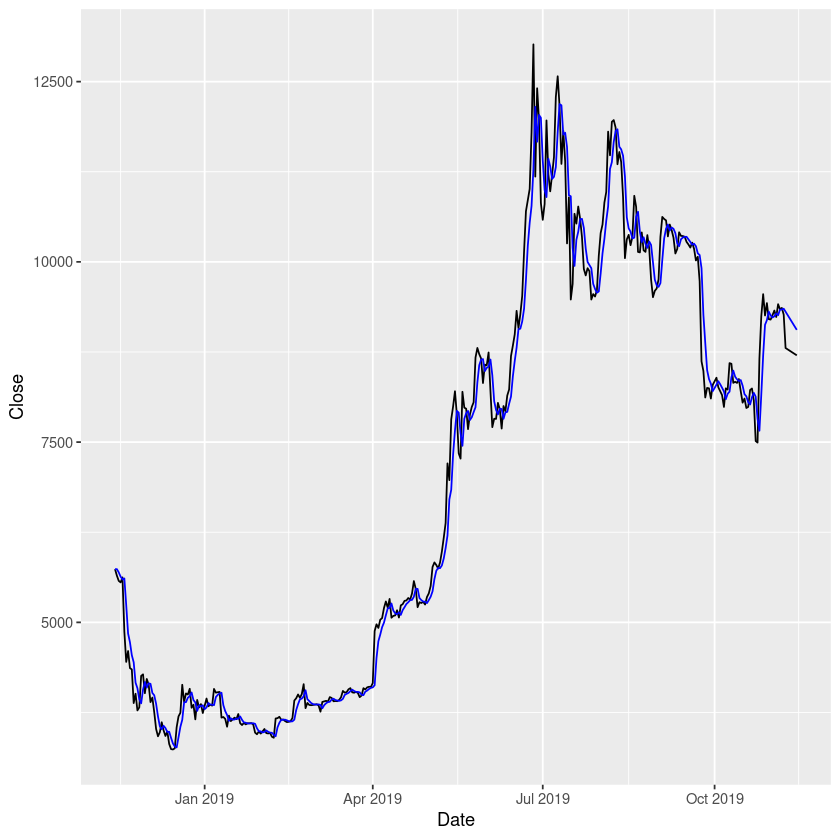

In [5]:
# plot the forecasted price and the actual price
Bit$fcst <- fcst
p + geom_line(aes(x=Date, y=fcst), color="blue")

The general behavior is that the forecasted price lags the actual price. 